# 1. Import library dan data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scp

In [2]:
titanic3 = pd.read_csv('data_titanic3.csv')

In [3]:
print("data: ", titanic3.shape)

data:  (1309, 14)


In [11]:
titanic3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


VARIABLE DESCRIPTIONS:
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

In [226]:
titanic3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# 2. Basic summary statistic

In [227]:
titanic3.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [228]:
def countplot(column):
    return sns.countplot(x= column, data= titanic3)

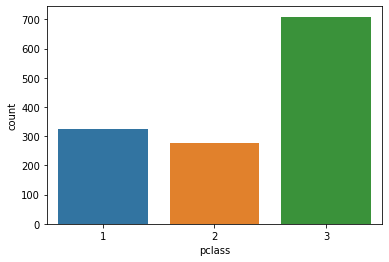

In [229]:
countplot('pclass')

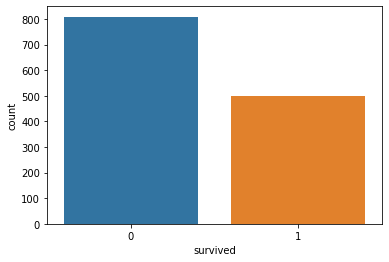

In [230]:
countplot('survived')

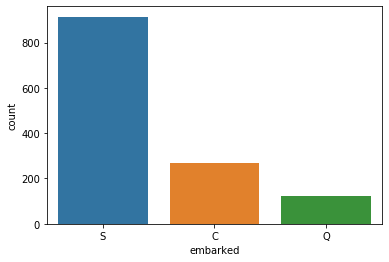

In [231]:
countplot('embarked')

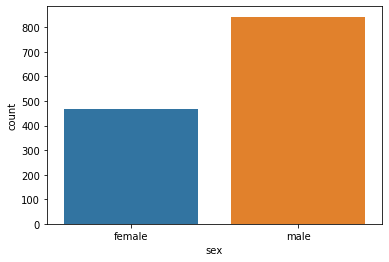

In [232]:
countplot('sex')

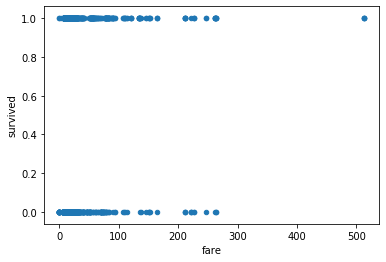

In [233]:
titanic3.plot.scatter(x="fare", y='survived', figsize=(6,4))

In [234]:
titanic3.corr(method='pearson')

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


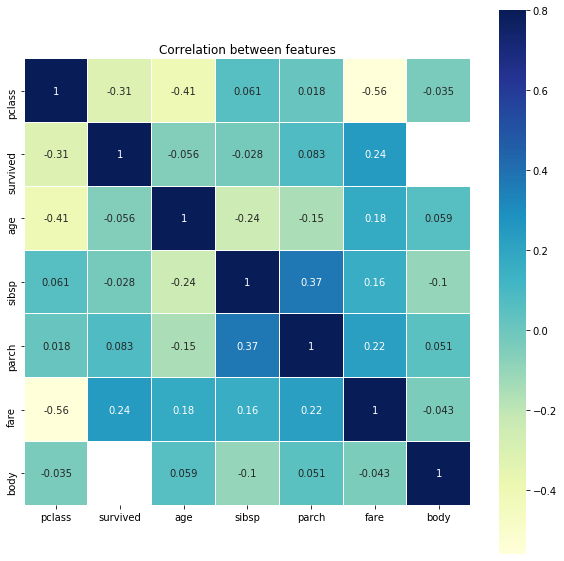

In [235]:
corr=titanic3.corr()#["survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [236]:
def compute_freq_chi2(x,y):
    freqtab = pd.crosstab(x,y)
    print("Frequency table")
    print("============================")
    print(freqtab)
    print("============================")
    chi2,pval,dof,expected = scp.chi2_contingency(freqtab)
    print("ChiSquare test statistic: ",chi2)
    print("p-value: ",pval)
    return

In [237]:
compute_freq_chi2(titanic3.survived,titanic3.pclass)

Frequency table
pclass      1    2    3
survived               
0         123  158  528
1         200  119  181
ChiSquare test statistic:  127.85915643930328
p-value:  1.7208259588256052e-28


In [238]:
compute_freq_chi2(titanic3.survived,titanic3.embarked)

Frequency table
embarked    C   Q    S
survived              
0         120  79  610
1         150  44  304
ChiSquare test statistic:  44.2417430714525
p-value:  2.471880987482563e-10


In [239]:
compute_freq_chi2(titanic3.survived,titanic3.sex)

Frequency table
sex       female  male
survived              
0            127   682
1            339   161
ChiSquare test statistic:  363.6179084388249
p-value:  4.589924936952945e-81


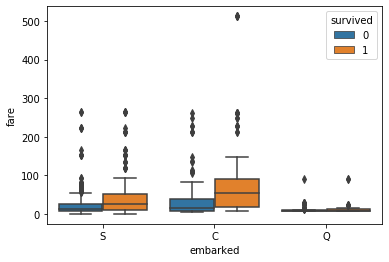

In [240]:
sns.boxplot(x="embarked", y="fare", hue="survived", data=titanic3);

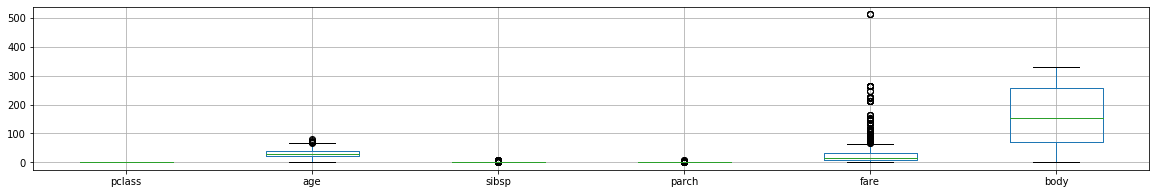

In [241]:
data2 = titanic3.drop(['survived'],axis=1)
data2.boxplot(figsize=(20,3))

# 3. Data Preprocessing

In [242]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [243]:
cek_null(titanic3)

           Total   Percent
body        1188  0.907563
cabin       1014  0.774637
boat         823  0.628724
home.dest    564  0.430863
age          263  0.200917
embarked       2  0.001528
fare           1  0.000764


In [244]:
#Counting the number of cabins
titanic3['cabin'].str.split(" ", expand=True).count().rename(lambda x: x+1)

1    295
2     41
3     15
4      5
dtype: int64

In [245]:
(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .survived
 .count()
 .unstack())

survived,0,1
cabin,,
A,11.0,11.0
B,18.0,47.0
C,37.0,57.0
D,14.0,32.0
E,11.0,30.0
F,8.0,13.0
G,2.0,3.0
T,1.0,NaN


In [246]:
(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .fare
 .mean()
 .unstack())

survived,0,1
cabin,,
A,34.168182,48.320445
B,76.363422,140.007628
C,111.878832,105.361112
D,46.653264,55.787247
E,46.431436,57.546807
F,11.241150,22.287500
G,10.462500,16.700000
T,35.500000,NaN


In [247]:
titanic3['cabin'] = titanic3['cabin'].fillna('U')

In [248]:
(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .survived
 .count()
 .unstack())

survived,0,1
cabin,,
A,11.0,11.0
B,18.0,47.0
C,37.0,57.0
D,14.0,32.0
E,11.0,30.0
F,8.0,13.0
G,2.0,3.0
T,1.0,NaN
U,707.0,307.0


In [249]:
(titanic3
 .groupby([titanic3.cabin.str[:1],'survived'])
 .fare
 .mean()
 .unstack())

survived,0,1
cabin,,
A,34.168182,48.320445
B,76.363422,140.007628
C,111.878832,105.361112
D,46.653264,55.787247
E,46.431436,57.546807
F,11.241150,22.287500
G,10.462500,16.700000
T,35.500000,NaN
U,16.529378,25.119516


In [250]:
titanic3_cleaned = titanic3.drop(['name', 'ticket', 'body', 'cabin','home.dest'], axis=1)
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,NaN
3,1,0,male,30.00,1,2,151.5500,S,NaN
4,1,0,female,25.00,1,2,151.5500,S,NaN


In [251]:
cek_null(titanic3_cleaned)

          Total   Percent
boat        823  0.628724
age         263  0.200917
embarked      2  0.001528
fare          1  0.000764


In [252]:
titanic3_cleaned['boat'] = titanic3_cleaned['boat'].fillna('None')

In [253]:
(titanic3_cleaned
 .groupby([titanic3_cleaned.boat,'survived'])
 .boat
 .count()
 .unstack())

survived,0,1
boat,,
1,NaN,5.0
10,NaN,29.0
11,NaN,25.0
12,1.0,18.0
13,NaN,39.0
13 15,NaN,2.0
13 15 B,NaN,1.0
14,1.0,32.0
15,NaN,37.0


In [254]:
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29.00,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2.00,1,2,151.5500,S,None
3,1,0,male,30.00,1,2,151.5500,S,None
4,1,0,female,25.00,1,2,151.5500,S,None


In [255]:
cek_null(titanic3_cleaned)

          Total   Percent
age         263  0.200917
embarked      2  0.001528
fare          1  0.000764


In [256]:
titanic3_cleaned['age'] = titanic3_cleaned['age'].fillna('median')

In [257]:
cek_null(titanic3_cleaned)

          Total   Percent
embarked      2  0.001528
fare          1  0.000764


In [258]:
titanic3_cleaned["embarked"] = titanic3_cleaned["embarked"].fillna('C')

In [259]:
titanic3_cleaned[titanic3_cleaned['fare'].isnull()]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
1225,3,0,male,60.5,0,0,NaN,S,None


In [260]:
titanic3_cleaned.dropna(inplace=True)

In [263]:
titanic3_cleaned.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,29,0,0,211.3375,S,2
1,1,1,male,0.92,1,2,151.5500,S,11
2,1,0,female,2,1,2,151.5500,S,None
3,1,0,male,30,1,2,151.5500,S,None
4,1,0,female,25,1,2,151.5500,S,None


NameError: name 'cek_null' is not defined